# The Sparks Foundation- Business Analytics and Data Science Internship
## Task 2: Predict and visually represent the optimum number of clusters in Iris dataset.
### By Jashan Meet
#### Step 1: Importing Essential Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [6]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# To get the number of rows and column data
print("Total No. of rows in the dataset is",iris.shape[0])
print("Total No. of columns in the dataset is",iris.shape[1])

Total No. of rows in the dataset is 150
Total No. of columns in the dataset is 5


In [8]:
#To get first few rows of the data set
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# To get the information about each column and data type of each feature/column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# To get basic statistics of numerical/continous data column
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# To check, does data have any null
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
#Splitting data into Dependent and Independent Variables
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

In [13]:
# to get average value of each column according to the dependent variable here it is species.
iris.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


C:\Users\EndUser\AppData\Local\Temp\ipykernel_12928\2390412111.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  iris=iris[~((iris<(Q1-1.5*IQR)) | (iris>(Q3+1.5*IQR))).any(axis=1)]


<AxesSubplot:>

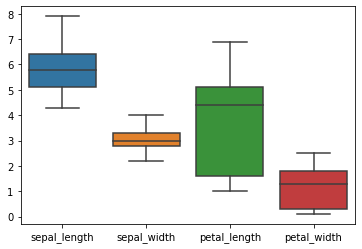

In [15]:
# removing outliers using Interquartile Range method
Q1=iris.quantile(0.25)
Q3=iris.quantile(0.75)
IQR=Q3-Q1
iris=iris[~((iris<(Q1-1.5*IQR)) | (iris>(Q3+1.5*IQR))).any(axis=1)]
sns.boxplot(data=iris)

In [17]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.75,random_state=0)
X_test.shape

(38, 4)

#### Supervised Learning
#### Logistic Regression

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model
LR=LogisticRegression()
# fit the model with data
LR.fit(X_train, y_train)

y_pred=LR.predict(X_test)

C:\Users\EndUser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# import the metrics class
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test, y_pred)
cnf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

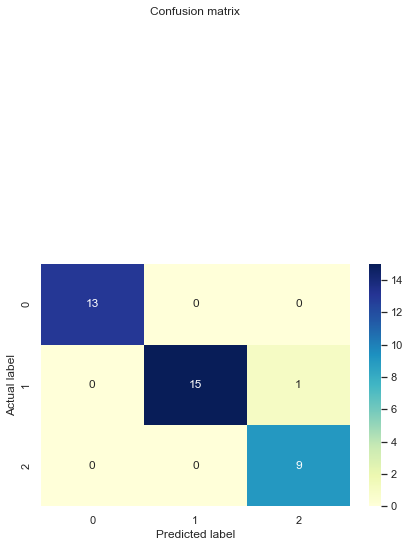

In [22]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy of Logistic regression:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=2))

Accuracy of Logistic regression: 0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [25]:
# import the metrics class
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test, y_pred)
cnf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [26]:
# Model performance
print("Accuracy for decision tree algorithm:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=2))

Accuracy for decision tree algorithm: 0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Unsupervised Learning : Cluster Analysis

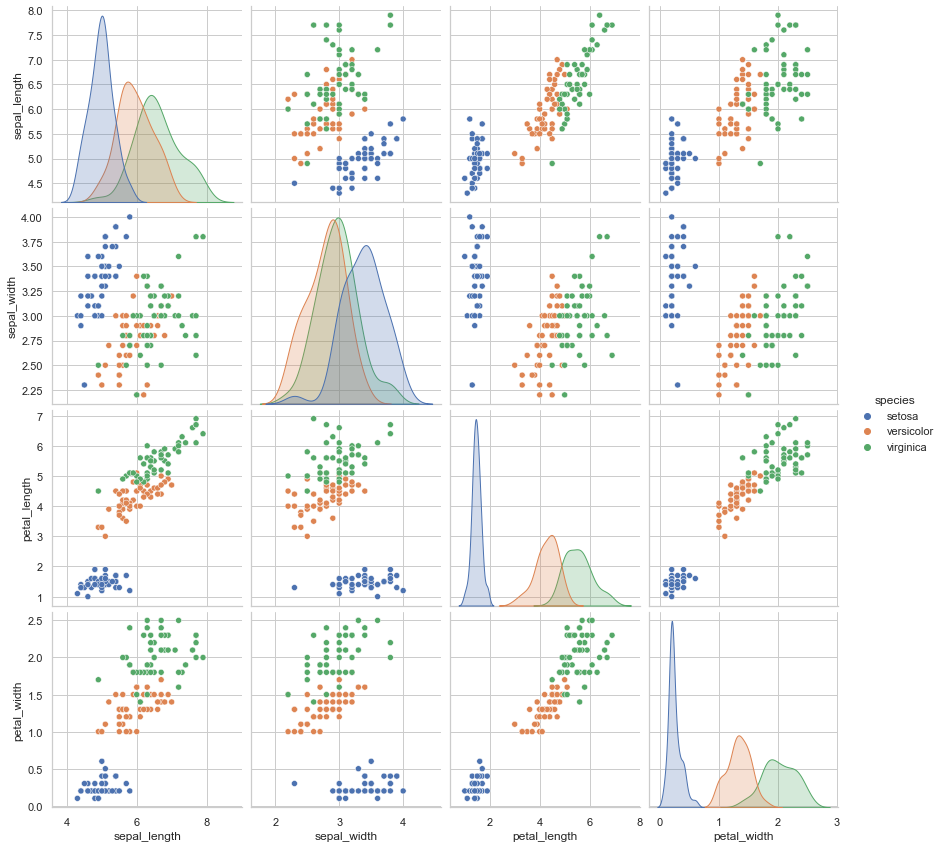

In [27]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### To find no. of clusters to be selected WCSS and Elbow Method

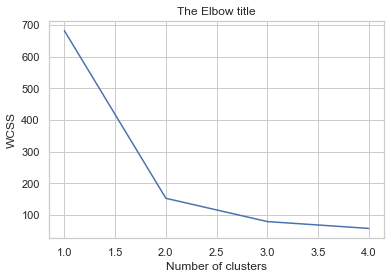

In [29]:
wcss=[]
for i in range(1,5):
  kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

number_clusters=range(1,5)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

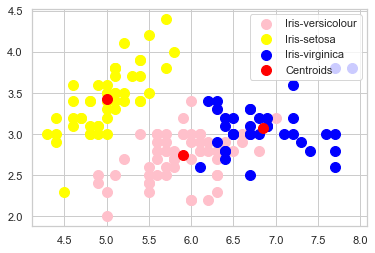

In [31]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [32]:
km= [KMeans(n_clusters=k, random_state=42).fit(X) for k in range (2,11)]
s = [silhouette_score(X, model.labels_, metric='euclidean') for model in km[1:]]

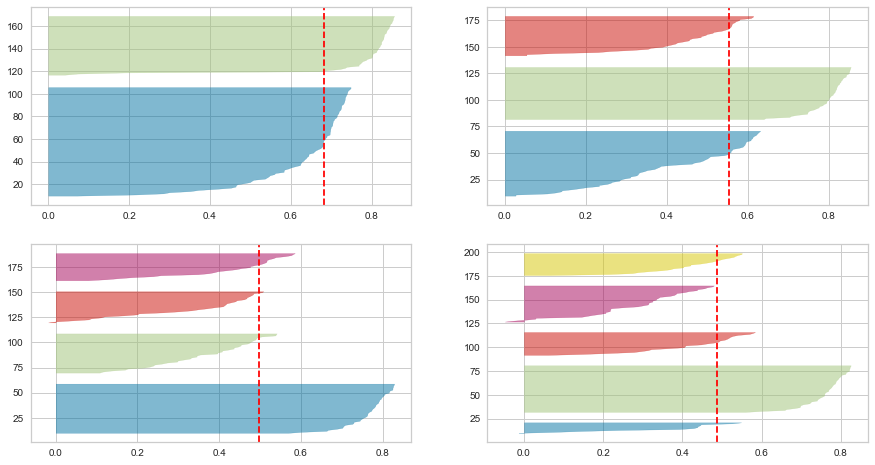

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km_labels=km.fit_predict(X)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

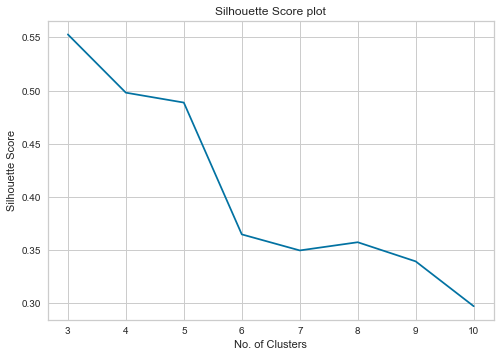

In [35]:
plt.plot(range(3,11),s)
plt.title('Silhouette Score plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()